## **Siesmic Surveying in Underground Mines**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### **importing and analysing the dataset :**

In [2]:
df = pd.read_csv('seismic-bumps.csv')
print('shape of the dataframe : ', df.shape)
df.head()

shape of the dataframe :  (2584, 19)


,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# mapping strings to floats for feeding into the models
df['seismic'] = df['seismic'].map({'a':0, 'b': 1})
df['seismoacoustic'] = df['seismoacoustic'].map({'a':0, 'b': 1, 'c':2})
df['shift'] = df['shift'].map({'N':0, 'W': 1})
df['hazard'] = df['hazard'].map({'a':0, 'b': 1})
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,0,0,0,15180,48,-72,-72,0.0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14720,33,-70,-79,0.0,1,0,1,0,0,0,0,0,2000,2000,0
2,0,0,0,8050,30,-81,-78,0.0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,28820,171,-23,40,0.0,1,0,1,0,0,0,0,0,3000,3000,0
4,0,0,0,12640,57,-63,-52,0.0,0,0,0,0,0,0,0,0,0,0,0


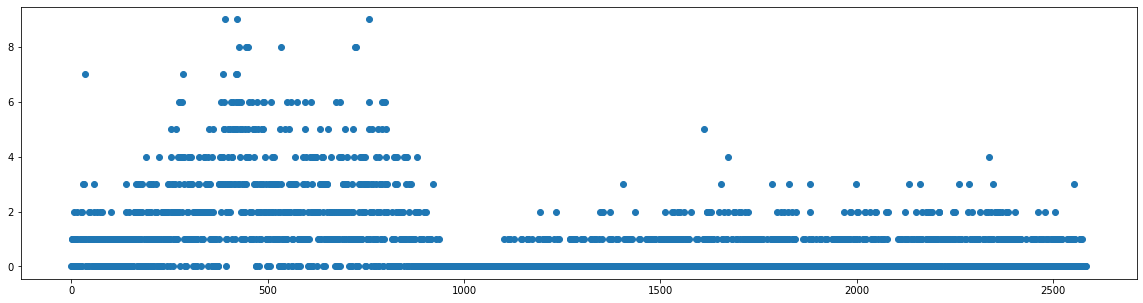

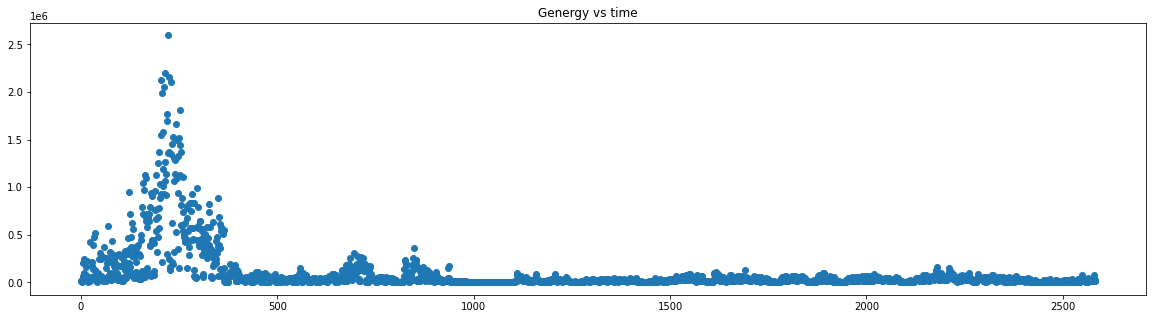

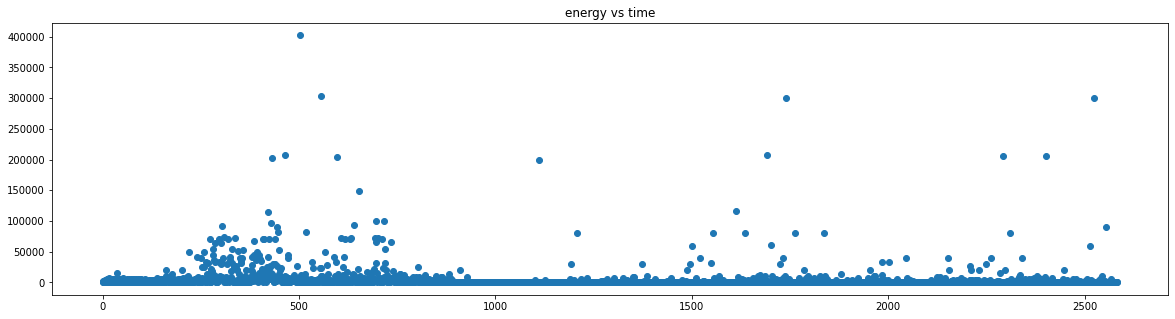

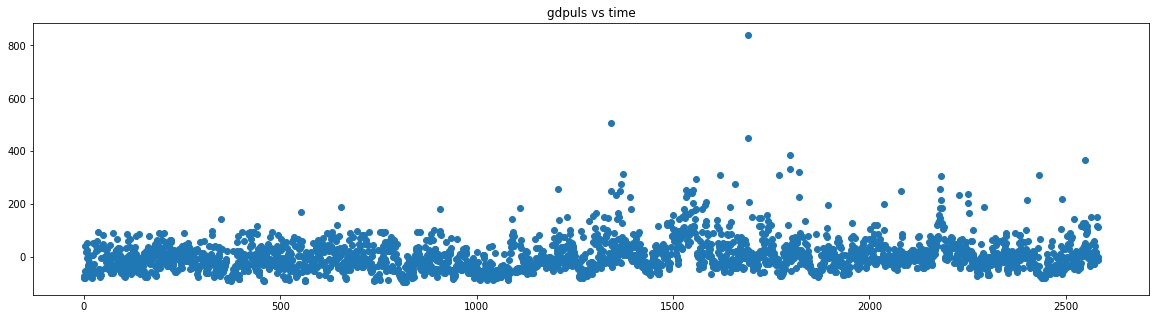

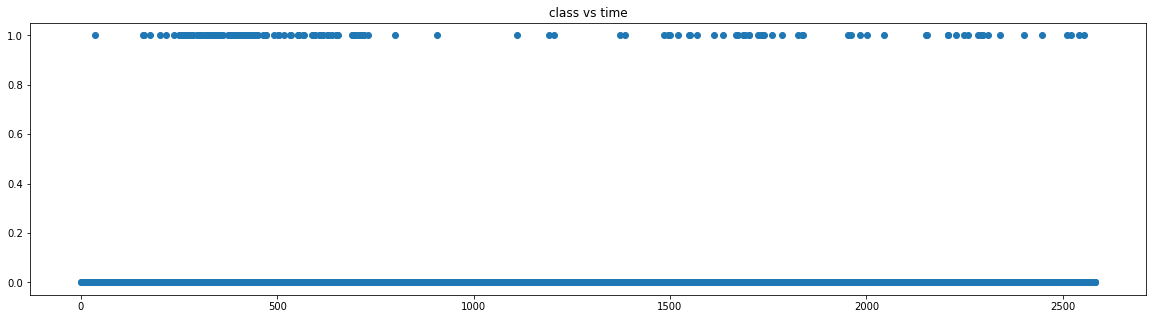

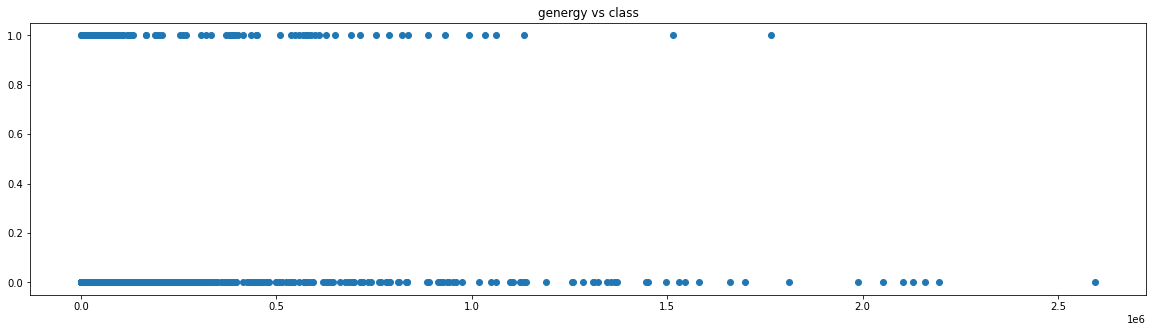

In [4]:
# making the plots for analysis 
figure, axis = plt.subplots(1,1, figsize =(20,5))
axis = plt.scatter(range(0,2584), df['nbumps'])

figure, axis = plt.subplots(1,1, figsize =(20,5))
axis.set_title('Genergy vs time')
axis = plt.scatter(range(0,2584), df['genergy'])

figure, axis = plt.subplots(1,1, figsize =(20,5))
axis.set_title('energy vs time')
axis = plt.scatter(range(0,2584), df['energy'])

figure, axis = plt.subplots(1,1, figsize =(20,5))
axis.set_title('gdpuls vs time')
axis = plt.scatter(range(0,2584), df['gdpuls'])

figure, axis = plt.subplots(1,1, figsize =(20,5))
axis.set_title('class vs time')
axis = plt.scatter(range(0,2584), df['class'])

figure, axis = plt.subplots(1,1, figsize =(20,5))
axis.set_title('genergy vs class')
axis = plt.scatter(df['genergy'],df['class'],)

From the above plots we can see that there is not much correlation between all the values and hence none of them can be ommitted without any significant loss of information.

#### **Splitting into training and testing part:**
#### 80:20 split

In [5]:
y = df.pop('class')
x = df.drop(['hazard'], axis=1, inplace=False)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#### **Selecting the model and training it:**
Random Forest is a very good classification model so let's try that.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [57]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

#### **Checking the accuracy:**

In [58]:
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.941972920696325


#### As we can see the accuracy is very high and thus this model can very relaibly predict the occurence of earthquakes from the sensor inputs. Now let us try and increase its accuracy by **tuning the hyperparameters**.

In [59]:
param_dist = {'n_estimators': randint(50,500), 'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002024609D600>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002024601FE20>})

In [60]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

y_pred = best_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9439071566731141


#### The accuracy increases t0 about **94.39%** which is very reliable for prediction purposes.

#### Let us try another model for even higher accuracy. This time using the LSTM model :


In [7]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Reshape
from keras.layers import Dense

#### **Making the Model and training it :**

In [8]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(x_train)

In [15]:
layer_1 = Reshape((1,17), input_shape=(17,))
layer_2 = LSTM(100, activation='relu')
layer_3 = Dense(1)
model = Sequential([normalizer,layer_1,layer_2,layer_3])
model.compile(optimizer='adam', loss='mse')

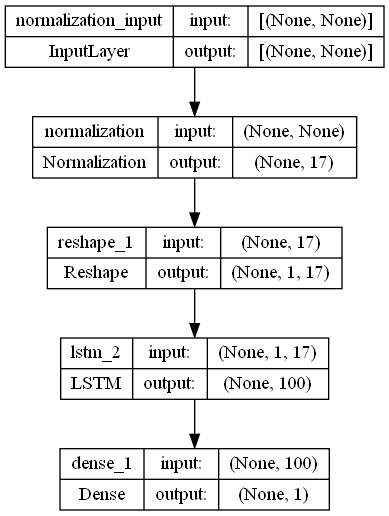

In [13]:
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

The above image shows the architecture of our LSTM model.

In [120]:
model.fit( x_train, y_train, epochs=10)

Epoch 1/10
65/65 [==============================] - 2s 3ms/step - loss: 0.0625
Epoch 2/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0582
Epoch 3/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 4/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 5/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0560
Epoch 6/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 7/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 8/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 9/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 10/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0537


#### **Checking the accuracy:**

In [122]:
y_pred2 = model.predict(x_test, verbose=2)
y_pred2 = np.argmax(y_pred2, axis=1)

c=0
for i in range(0,516):
    if (y_test.iloc[i] == y_pred2[i]):
        c=c+1

print("Accuracy:", c/517)

17/17 - 0s - 32ms/epoch - 2ms/step
Accuracy: 0.941972920696325


Since our accuracy remains almost the same from both the models it is probablr that the rest of the data in the dataset is anomalous and cosidering it's size (**~5%**)  <br> it is well within the margin of error.

So our final accuracy remains around **94%** and we'll use the previous **Random Forest Classifier Model** for prediction purposes due to it's slightly higher accuracy and better adaptibility.